# How to use the provided logging module

This guide should give you an brief overview on how to use the logging tool, which is provided under utils/logging/log.py in the Dida Deep Learning Tools.

## Step 1: Creating the logs

The dida Deep Learning Tools automatically use the logging tool. So if you only want to train a model and view the logged runs you can directly skip to Step 2. All the logging should happen automatically. 

This first sections gives you an overview how the logging tool works, so you will be able to log your data for projects outside of the DLTools or modify it if you want. 

First you need to import the tool. From the root path of the DLTools this should look like this: ``import utils.logging.log as log``

Then you can create a object from the class `Log` like this: `logger = log.Log(train_config, run_name='Test run')` 

Using the object you can now log hyperparameters or metrics like this:

`logger.log_hyperparameters({{'Architecture': 'CNN', 'Learning rate': 0.001}})
for batch in batches:
    loss = train_network()
    logger.log_metric('Loss', loss)`

Alternatively you can use a with statement like this:

`with Log(training_config) as logger:
    logger.log_metric('Loss', 0.1)
`

If you want to access the mlflow run which operates in background you can do this with `logger.access_run()` which will return a `mlflow.ActiveRun`.

Otherwise you can still always just call mlflow functions like `mlflow.search_runs()` anytime after you created a `Log()` object.

## Step 2: Viewing the results

If you want to train a model using the DLTools actually you do not have to really do anything. All the hyperparameters and metrics should automatically be logged. So in this part I will only show how to access and work with the logs. 

If you want to add or change anything regarding the hyperparameters and metrics that will be logged, all the logging happens in the training/* scripts using the global config and training config. 

Connect to the server where the training happened with portforwarding to port `5000`. (Of course not needed if you run locally)
`ssh -L 5000:localhost:5000 [server ip]`

Make sure you are in the projects directory so mlflow can find the logs.
`cd deep-learning-tools/`

Then start the mlflow user interface with `mlflow ui`.

If you want to use a different port then the default `5000`run `mlflow ui --port xxxx`

A server should start notifying you that it listens for connections. 

Then you can access the user interface with your webbrowser

`http://localhost:5000`

On the starting page you see all the runs indicated with their Start Time and other features that got recorded like the name of the Run and the Data Loader config

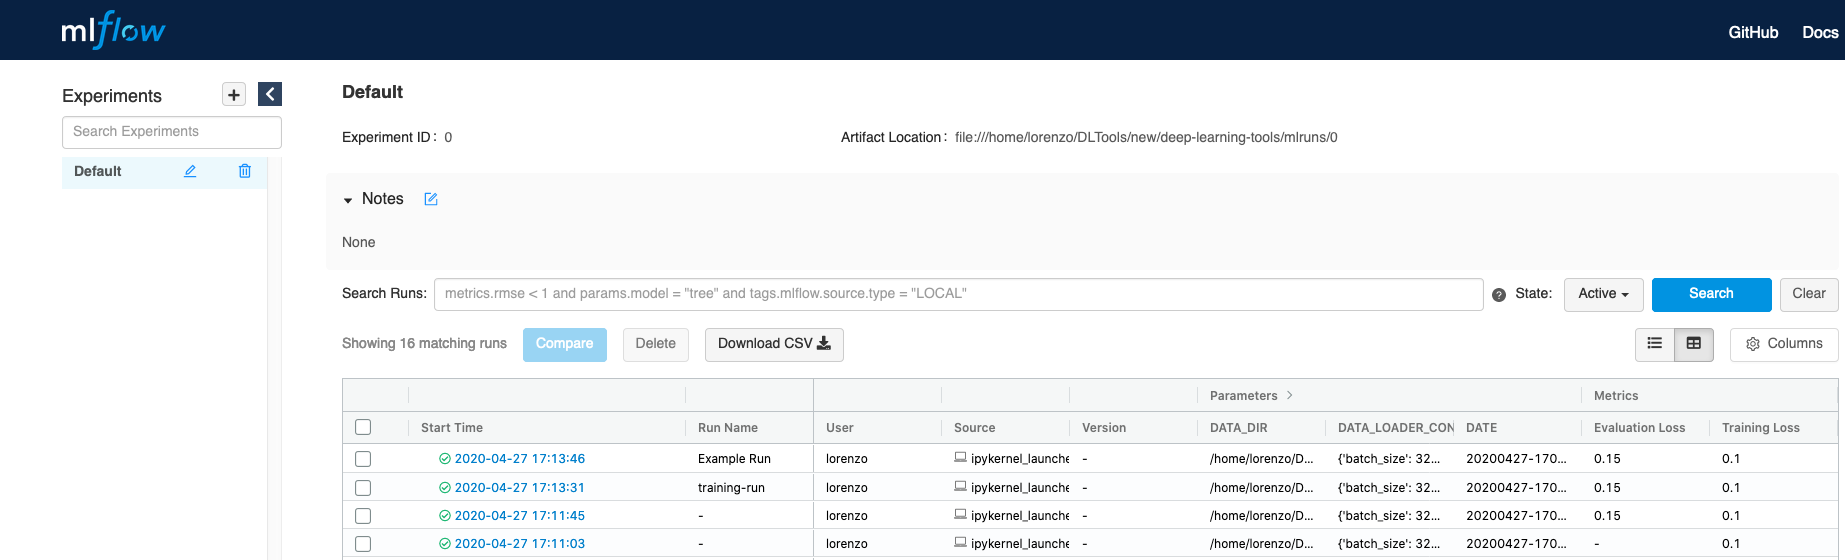

If you click one of the runs, you will see an overview of all the hyperparameters including ROOT_PATH, Learning Rate, the number of Epochs and the model config. 
Also you can see the metrics you recorded. 

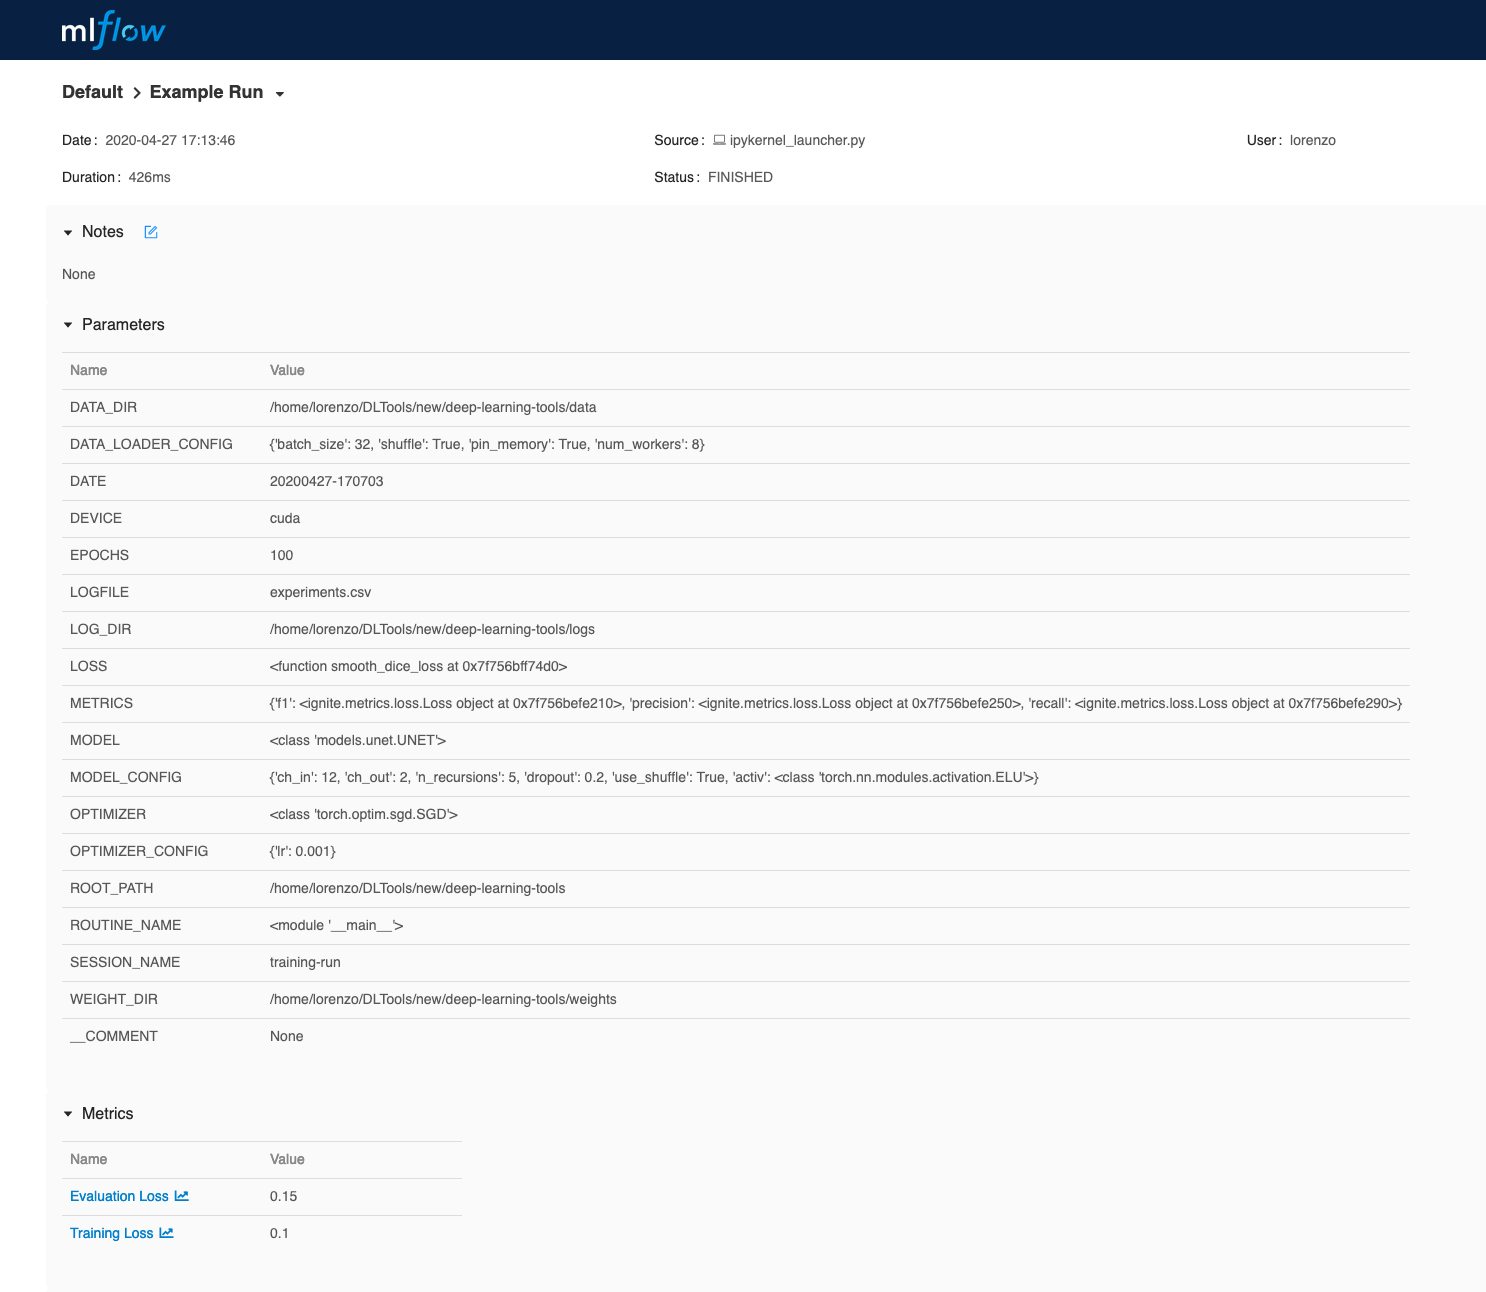

By clicking on one of the metrics you can have a graphical overview

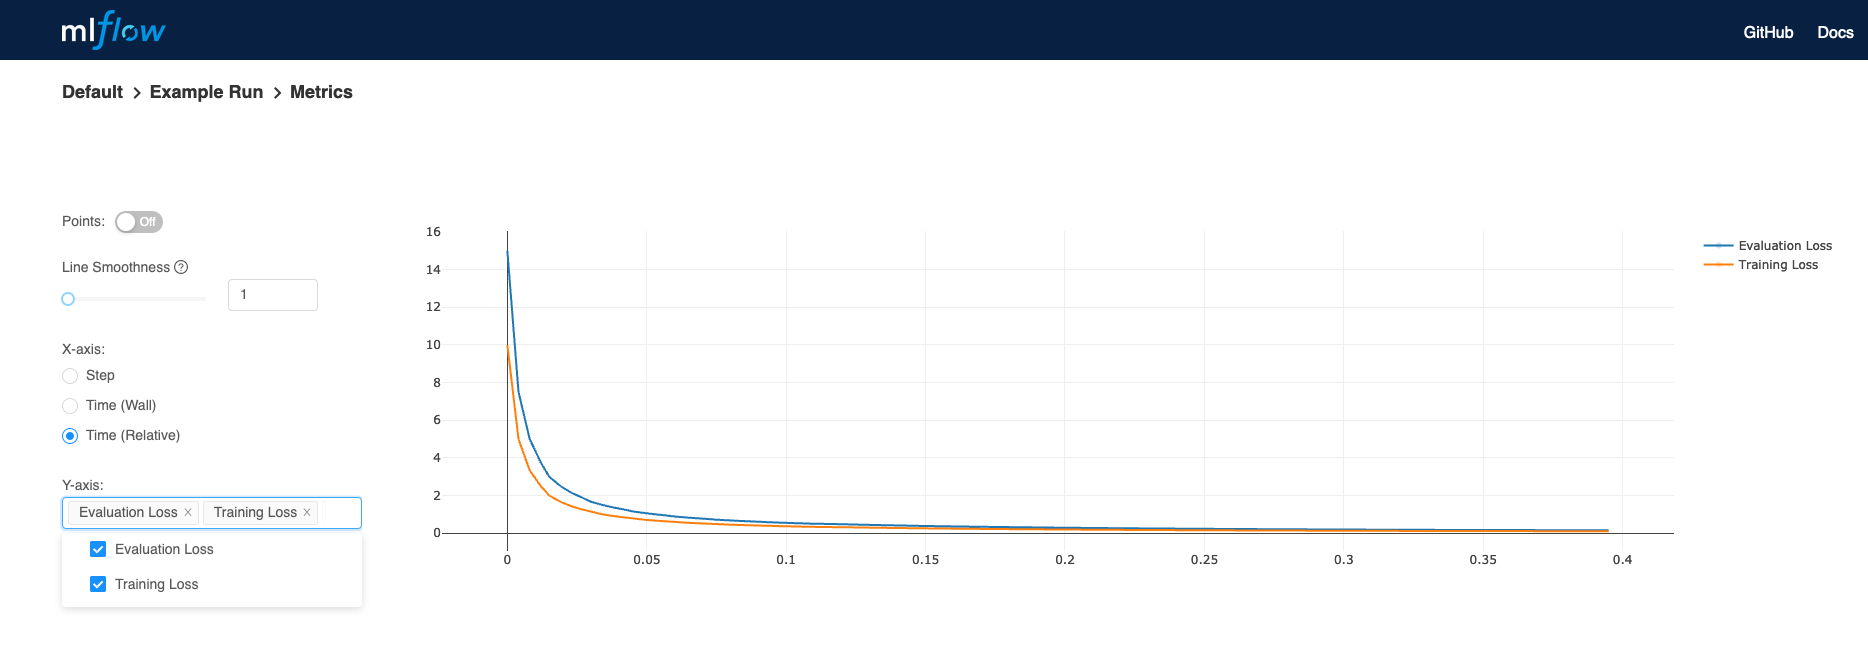